<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [48]:
# Data handling and visualization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# For Facebook Prophet (time series forecasting)
from prophet import Prophet
from prophet.plot import plot_plotly

# Evaluiation
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

In [49]:
# Load preprocessed data
df = pd.read_csv('preprocessed_bitcoin_data.csv', index_col='Date', parse_dates=True)

# Display the first few rows of the data
df.head()

,Close,High,Low,Open,Volume,Close_diff
Date,,,,,,
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,-32.894012
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,-29.644012
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,14.108002
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,-10.082977
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,3.330994


In [50]:
df.reset_index(inplace=True)
df = df[['Date', 'Close']]

In [51]:
df.columns = ['ds', 'y']

In [52]:
df

,ds,y
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3787,2025-01-30,104735.304688
3788,2025-01-31,102405.023438
3789,2025-02-01,100655.906250
3790,2025-02-02,97688.976562


In [53]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg_bnu4v/m6p6ig9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg_bnu4v/7utbjaft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51070', 'data', 'file=/tmp/tmprg_bnu4v/m6p6ig9c.json', 'init=/tmp/tmprg_bnu4v/7utbjaft.json', 'output', 'file=/tmp/tmprg_bnu4v/prophet_modelmso3aqdw/prophet_model-20250203071142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [55]:
df.tail()

,ds,y
3787,2025-01-30,104735.304688
3788,2025-01-31,102405.023438
3789,2025-02-01,100655.906250
3790,2025-02-02,97688.976562
3791,2025-02-03,94132.515625


In [57]:
# Create future dataframe
future_dates = model.make_future_dataframe(periods=60)  # Predict for the next 60 days

In [58]:
future_dates.tail()

,ds
3847,2025-03-31
3848,2025-04-01
3849,2025-04-02
3850,2025-04-03
3851,2025-04-04


In [59]:
# Make predictions
prediction = model.predict(future_dates)

In [60]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3847,2025-03-31,93523.040426,91194.102964,104187.379524,93292.187990,94018.182742,3988.849467,3988.849467,3988.849467,27.773138,27.773138,27.773138,3961.076329,3961.076329,3961.076329,0.0,0.0,0.0,97511.889893
3848,2025-04-01,93622.743651,91269.500552,103988.699427,93387.434755,94129.041660,3922.783500,3922.783500,3922.783500,-26.036336,-26.036336,-26.036336,3948.819837,3948.819837,3948.819837,0.0,0.0,0.0,97545.527152
3849,2025-04-02,93722.446876,91459.208415,104745.166046,93468.595850,94275.135300,3963.615432,3963.615432,3963.615432,35.710075,35.710075,35.710075,3927.905357,3927.905357,3927.905357,0.0,0.0,0.0,97686.062308
3850,2025-04-03,93822.150101,90864.596683,104205.620395,93564.319975,94400.210264,3871.925606,3871.925606,3871.925606,-26.650577,-26.650577,-26.650577,3898.576183,3898.576183,3898.576183,0.0,0.0,0.0,97694.075706
3851,2025-04-04,93921.853325,91021.432383,104435.232459,93650.001984,94525.467409,3866.931918,3866.931918,3866.931918,5.719202,5.719202,5.719202,3861.212715,3861.212715,3861.212715,0.0,0.0,0.0,97788.785243


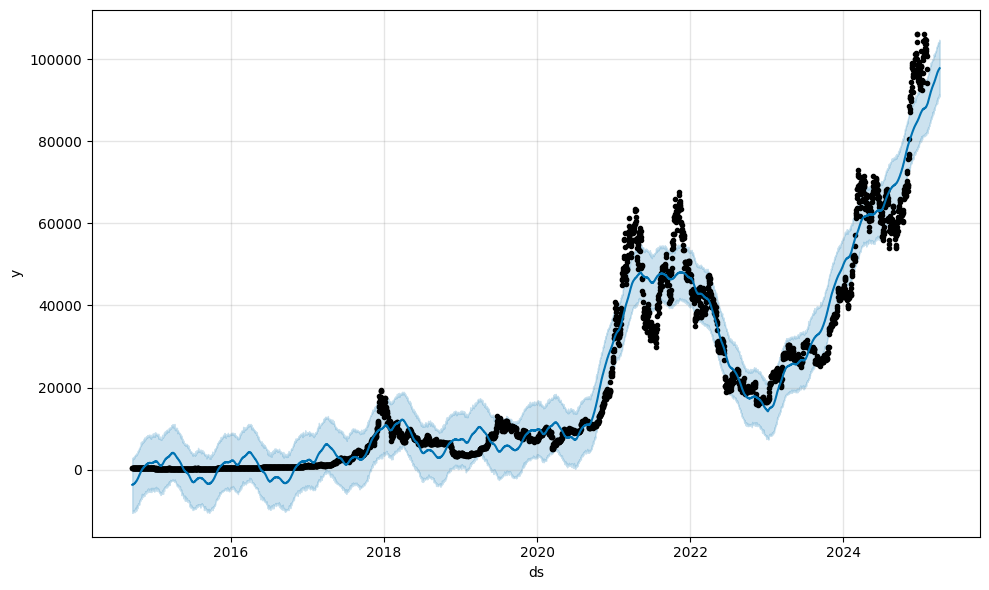

In [61]:
# Plot prediction
fig = model.plot(prediction)
plt.show()

In [62]:
plot_plotly(model, prediction)

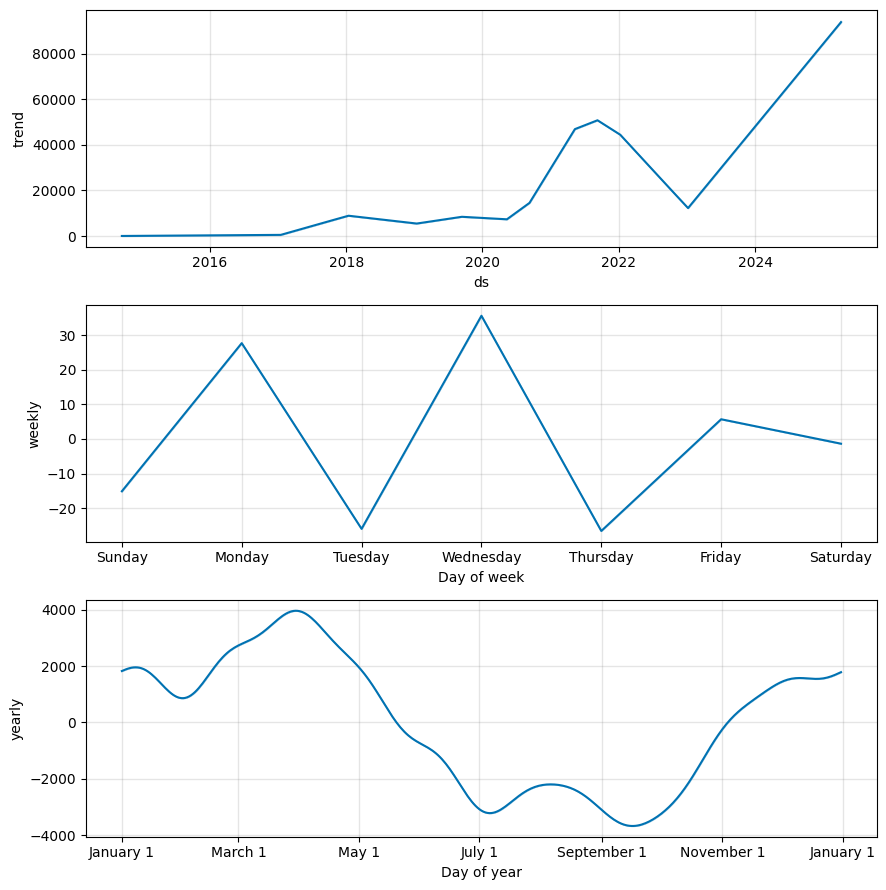

In [63]:
#seasonality
fig_2 = model.plot_components(prediction)
plt.show()

## Model Evaluation

In [64]:
df_cv = cross_validation(model, horizon='60 days')

INFO:prophet:Making 113 forecasts with cutoffs between 2015-09-24 00:00:00 and 2024-12-05 00:00:00


  0%|          | 0/113 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprg_bnu4v/gcm3p15a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg_bnu4v/2idnfpi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10766', 'data', 'file=/tmp/tmprg_bnu4v/gcm3p15a.json', 'init=/tmp/tmprg_bnu4v/2idnfpi5.json', 'output', 'file=/tmp/tmprg_bnu4v/prophet_modelngl45xmh/prophet_model-20250203071314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg_bnu4v/g8jyzqdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprg_bnu4v/71tjxcp_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [65]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
6775,2025-01-30,80029.419354,73828.999760,86039.237409,104735.304688,2024-12-05
6776,2025-01-31,80174.378904,73853.477800,86020.809164,102405.023438,2024-12-05
6777,2025-02-01,80355.862080,74172.782587,86342.148304,100655.906250,2024-12-05
6778,2025-02-02,80558.108623,74740.630582,86585.236491,97688.976562,2024-12-05
6779,2025-02-03,80823.004900,74701.443912,86499.389854,94132.515625,2024-12-05


In [66]:
df_performance = performance_metrics(df_cv)

In [67]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1.011913e+08,10059.386663,6536.605266,0.269031,0.231408,0.272008,0.293510
1,7 days,1.032258e+08,10160.009754,6629.325821,0.272606,0.234842,0.276647,0.286136
2,8 days,1.054300e+08,10267.912876,6729.786852,0.276667,0.241632,0.281684,0.277286
3,9 days,1.062975e+08,10310.068195,6771.385799,0.278769,0.246199,0.284945,0.271386
4,10 days,1.088352e+08,10432.411284,6854.586301,0.281817,0.250689,0.288927,0.266962
5,11 days,1.119438e+08,10580.350180,6949.176943,0.286117,0.256157,0.293636,0.256637
6,12 days,1.149521e+08,10721.573505,7042.809694,0.290934,0.258937,0.298752,0.249263
7,13 days,1.178102e+08,10854.040759,7122.387338,0.295586,0.260277,0.303597,0.238938
8,14 days,1.211986e+08,11009.022907,7213.042603,0.300330,0.268342,0.308535,0.237463
9,15 days,1.257809e+08,11215.209262,7341.181524,0.307092,0.269650,0.315208,0.237463


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



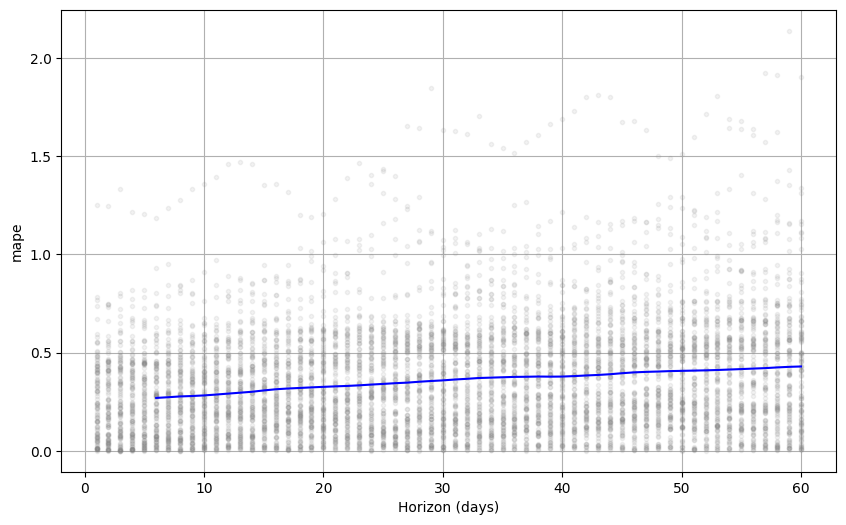

In [68]:
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()